# Lending Club Case Study:

Lending Club is the largest online loan marketplace, facilitating personal loans, business loans and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study. In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

**Team members : Uday Kumar Adavi & Bibhu Sundar Sahoo**

### Import libraries


In [1]:
#Importing libraries needed for this EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### Environment setup

In [2]:
#Setting environment variables
sns.set_style("dark")
plt.style.use("tableau-colorblind10")
warnings.filterwarnings("ignore")

## 1.) Data Sourcing / Gathering & Understanding:

In [3]:
#extract data from csv file
loan_df = pd.read_csv('loan.csv')
loan_df.shape # check shape to know how many rows and columns have been loaded into the dataframe

(39717, 111)

In [4]:
#inspect sample rows
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


For the current EDA exercise, the focus will be on Customer and Loan attributes only. Hence we can straight away remove the variables that represent post loan behaviour of the customer.
Based on the description in the data dictionary,decision has been made to remove the below columns:
 - 'total_pymnt',
 - 'total_pymnt_inv'
 - 'total_rec_prncp'
 - 'total_rec_int'
 - 'total_rec_late_fee'
 - 'pymnt_plan'
 - 'out_prncp'
 - 'out_prncp_inv'
 - 'last_pymnt_d'
 - 'last_pymnt_amnt'
 - 'next_pymnt_d'

In [5]:
#Remove data not in scope of our analysis
post_loan_data_points = ['total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int'
                         ,'total_rec_late_fee','pymnt_plan','out_prncp','out_prncp_inv'
                        ,'last_pymnt_d','last_pymnt_amnt', 'next_pymnt_d']

loan_df.drop(labels = post_loan_data_points, axis=1, inplace = True)

loan_df.shape # check shape to know how many rows and columns have been loaded into the dataframe

(39717, 100)

The primary purpose of our analysis is to understand the patterns of default. The 'loan_status' column is the relevant column to understand this.

In [6]:
# target variables of interest
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

For the analysis, we will remove the rows with loan status as 'Current' because these loans are still in the their life time and we do not know whether the customers will default on these loans or not

In [7]:
#Remove the 'Current' loan status rows
loan_df = loan_df[loan_df.loan_status !='Current']

#check the column to verify
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

## 2.) Data Handling & Cleaning
 - data cleaning: missing vaslues, tratment, check high % of missing values, drop rows, clumns, impute (try to explain in documentation so the grader can understand)
 - outliers, treatment,
 - derived variables, transformations, % metrics?\
 - data types

In [8]:
# Drop Duplicate rows if any?
loan_df.drop_duplicates()
loan_df.shape

(38577, 100)

In [9]:
#check columns and null counts
loan_df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 100 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38577 non-null  int64  
 1   member_id                       38577 non-null  int64  
 2   loan_amnt                       38577 non-null  int64  
 3   funded_amnt                     38577 non-null  int64  
 4   funded_amnt_inv                 38577 non-null  float64
 5   term                            38577 non-null  object 
 6   int_rate                        38577 non-null  object 
 7   installment                     38577 non-null  float64
 8   grade                           38577 non-null  object 
 9   sub_grade                       38577 non-null  object 
 10  emp_title                       36191 non-null  object 
 11  emp_length                      37544 non-null  object 
 12  home_ownership                 

**Finding:** There are several columns which have 0 non-null values

### **Missing values and their handling:**

In [10]:
#Removing columns with 0 non null values
loan_df.dropna(axis = 1, how = 'all',inplace = True)

#Removing rows with 0 non null values
loan_df.dropna(axis = 0, how = 'all',inplace = True)

#Checking after removing
loan_df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38577 non-null  int64  
 1   member_id                   38577 non-null  int64  
 2   loan_amnt                   38577 non-null  int64  
 3   funded_amnt                 38577 non-null  int64  
 4   funded_amnt_inv             38577 non-null  float64
 5   term                        38577 non-null  object 
 6   int_rate                    38577 non-null  object 
 7   installment                 38577 non-null  float64
 8   grade                       38577 non-null  object 
 9   sub_grade                   38577 non-null  object 
 10  emp_title                   36191 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              38577 non-null  object 
 13  annual_inc                  385

In [11]:
# % of missing values - for columns that have missing values
cols_50null = loan_df.isnull().mean().round(4).sort_values( ascending = False)*100
cols_50null[cols_50null.values > 0]

mths_since_last_record        92.90
mths_since_last_delinq        64.56
desc                          32.47
emp_title                      6.19
emp_length                     2.68
pub_rec_bankruptcies           1.81
chargeoff_within_12_mths       0.15
collections_12_mths_ex_med     0.15
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
dtype: float64

Missing data is in these columns:
 - desc
 - emp_title 
 - emp_length
 - pub_rec_bankruptcies 
 - collections_12_mths_ex_med 
 - chargeoff_within_12_mths 
 - revol_util 
 - tax_liens 
 - title 
 - last_credit_pull_d 

In [12]:
#Removing columns with nulls greater than 50 perc
cols_drop1 = cols_50null[cols_50null.values > 50]
loan_df.drop(columns=cols_drop1.index, inplace=True)

In [13]:
#Checking after removing
loan_df.shape

(38577, 44)

In [14]:
#Check value range for column to remove columns with single value
cols_uniquevals=loan_df.nunique().sort_values()
cols_uniquevals

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
term                              2
loan_status                       2
pub_rec_bankruptcies              3
verification_status               3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_credit_pull_d              106
int_rate                        370
earliest_cr_line                524
zip_code                    

In [15]:
#Removing columns with single values
cols_drop2 = cols_uniquevals[cols_uniquevals.values == 1]
loan_df.drop(columns=cols_drop2.index,inplace=True)

In [16]:
#Checking after removing
loan_df.shape

(38577, 36)

In [17]:
# Check Final left out missing values the dataset
cols_50null = loan_df.isnull().mean().round(4).sort_values( ascending = False)*100
cols_50null[cols_50null.values > 0]

desc                    32.47
emp_title                6.19
emp_length               2.68
pub_rec_bankruptcies     1.81
revol_util               0.13
title                    0.03
last_credit_pull_d       0.01
dtype: float64

### Remaining Missing Data

Missing data is in these columns:
- desc                       32.47
- emp_title                   6.19
- emp_length                  2.68
  - Impute using median
- pub_rec_bankruptcies        1.81
  - Impute using median

Below can be ignored:
- revol_util                  0.13
- title                       0.03
- last_credit_pull_d          0.01
- desc                        32.47 


Ignoring few rows as they have missing values for revol_util,title,last_credit_pull_d which is less than 0.13% of the entire dataset

In [18]:
loan_df.dropna(subset=['revol_util','title','last_credit_pull_d'],inplace=True)

loan_df.shape

(38514, 36)

### Impute missing Data

##### 1) Impute emp_length

In [19]:
# Look at distribution of emp length
loan_df.emp_length.value_counts(dropna=False)

10+ years    8486
< 1 year     4494
2 years      4286
3 years      4008
4 years      3333
5 years      3187
1 year       3162
6 years      2164
7 years      1707
8 years      1433
9 years      1225
NaN          1029
Name: emp_length, dtype: int64

In [20]:
#Replace the nulls with the Mode
loan_df['emp_length'] = loan_df.emp_length.fillna(loan_df.emp_length.mode()[0])

#check distribution
loan_df.emp_length.value_counts(dropna=False)

10+ years    9515
< 1 year     4494
2 years      4286
3 years      4008
4 years      3333
5 years      3187
1 year       3162
6 years      2164
7 years      1707
8 years      1433
9 years      1225
Name: emp_length, dtype: int64

#### 2) Impute pub_rec_bankruptcies

In [21]:
# Look at distribution of pub_rec_bankruptcies
loan_df.pub_rec_bankruptcies.value_counts(dropna=False)

0.0    36177
1.0     1636
NaN      696
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [22]:
#Replace the nulls with the Mode
loan_df['pub_rec_bankruptcies'] = loan_df.pub_rec_bankruptcies.fillna(loan_df.pub_rec_bankruptcies.mode()[0])

#check
loan_df.pub_rec_bankruptcies.value_counts(dropna=False)

0.0    36873
1.0     1636
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [23]:
# Check Final left out missing values the dataset
cols_50null = loan_df.isnull().mean().round(4).sort_values( ascending = False)*100
cols_50null[cols_50null.values > 0]

desc         32.47
emp_title     6.17
dtype: float64

#### Final missing value in the dataset

In [24]:
# Final list of colums and their % missing values
loan_df.isnull().mean().round(4).sort_values( ascending = False)*100

desc                       32.47
emp_title                   6.17
purpose                     0.00
zip_code                    0.00
addr_state                  0.00
dti                         0.00
delinq_2yrs                 0.00
earliest_cr_line            0.00
inq_last_6mths              0.00
open_acc                    0.00
pub_rec                     0.00
revol_bal                   0.00
revol_util                  0.00
total_acc                   0.00
recoveries                  0.00
collection_recovery_fee     0.00
last_credit_pull_d          0.00
title                       0.00
id                          0.00
member_id                   0.00
grade                       0.00
loan_amnt                   0.00
funded_amnt                 0.00
funded_amnt_inv             0.00
term                        0.00
int_rate                    0.00
installment                 0.00
sub_grade                   0.00
url                         0.00
emp_length                  0.00
home_owner

### **Data Formatting & Standardising:**

In [25]:
# Check format
loan_df[['term','int_rate','revol_util','emp_length']].head()

,term,int_rate,revol_util,emp_length
0,36 months,10.65%,83.70%,10+ years
1,60 months,15.27%,9.40%,< 1 year
2,36 months,15.96%,98.50%,10+ years
3,36 months,13.49%,21%,10+ years
5,36 months,7.90%,28.30%,3 years


#### 1) Format Term, remove trail character months

In [26]:
# Format term, remove trailing months
#loan_df['term']=loan_df.term.str.replace(' months','')
#loan_df['term']=loan_df.term.str.strip().astype(int)
#Check transformed format
#loan_df.term.unique()

#### 2) Format int_rate, remove trailing %

In [27]:
# Format term, remove trailing %
loan_df['int_rate']=loan_df['int_rate'].str.replace('%','').astype(float)

# Check format
loan_df.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

#### 3) Format revol_util, remove trailing %

In [28]:
# Format term, remove trailing %
loan_df['revol_util']=loan_df['revol_util'].str.replace('%','').astype(float)

# Check format
loan_df.revol_util.head()

0    83.7
1     9.4
2    98.5
3    21.0
5    28.3
Name: revol_util, dtype: float64

#### 4) Emp length

In [29]:
#loan_df.emp_length = loan_df.emp_length.apply(lambda x: 0 if x=='< 1 year' else (x.split()[0]) )

#### 5) 'issue_d'
    #### This is days from

In [30]:
# Check format
loan_df[['issue_d','earliest_cr_line','last_credit_pull_d']].describe()

,issue_d,earliest_cr_line,last_credit_pull_d
count,38514,38514,38514
unique,55,524,106
top,Nov-11,Oct-99,May-16
freq,2060,360,9322


In [31]:
# issue_d format
loan_df['issue_d'] = pd.to_datetime(loan_df.issue_d,format='%b-%y')
loan_df['earliest_cr_line'] = pd.to_datetime(loan_df.earliest_cr_line,format='%b-%y')
loan_df['last_credit_pull_d'] = pd.to_datetime(loan_df.last_credit_pull_d,format='%b-%y')

print(loan_df[['issue_d','earliest_cr_line','last_credit_pull_d']].describe())
print("\n The 2068-12-01 is incorrect data for earliest_cr_line during formatting function from python")

                    issue_d     earliest_cr_line   last_credit_pull_d
count                 38514                38514                38514
unique                   55                  524                  106
top     2011-11-01 00:00:00  1999-10-01 00:00:00  2016-05-01 00:00:00
freq                   2060                  360                 9322
first   2007-06-01 00:00:00  1969-02-01 00:00:00  2007-05-01 00:00:00
last    2011-12-01 00:00:00  2068-12-01 00:00:00  2016-05-01 00:00:00

 The 2068-12-01 is incorrect data for earliest_cr_line during formatting function from python


In [32]:
today = pd.datetime.today()

count_dateissue = loan_df[loan_df.earliest_cr_line > today ]['earliest_cr_line'].value_counts().sum()
print("We have " + str(count_dateissue) + " record with incorrect dates reflected to be fixed by subtracting 100 \n")

loan_df['earliest_cr_line']=loan_df.earliest_cr_line.apply(lambda x :x.replace(year=x.year-100) if x.year > today.year else x)

print(loan_df[['issue_d','earliest_cr_line','last_credit_pull_d']].describe()) 
print("\n We have " + str(loan_df[loan_df.earliest_cr_line > today ]['earliest_cr_line'].value_counts().sum()) + " record with incorrect dates reflected now\n")

We have 85 record with incorrect dates reflected to be fixed by subtracting 100 

                    issue_d     earliest_cr_line   last_credit_pull_d
count                 38514                38514                38514
unique                   55                  524                  106
top     2011-11-01 00:00:00  1999-10-01 00:00:00  2016-05-01 00:00:00
freq                   2060                  360                 9322
first   2007-06-01 00:00:00  1946-01-01 00:00:00  2007-05-01 00:00:00
last    2011-12-01 00:00:00  2008-11-01 00:00:00  2016-05-01 00:00:00

 We have 0 record with incorrect dates reflected now



### **Distributions, Outliers & Treatment**value_counts

In [33]:
#define custom function to plot distribution plot and box plot for numeric variables
def distplot_num(var, df):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    sns.distplot(df[var])
    plt.title("Distribution of "+var)

    plt.subplot(1,2,2)
    sns.boxplot(df[var])
    plt.title("Boxplot for "+var)
    
    plt.show()       

In [34]:
#define custom function for understanding distribution based on percentiles
def dist_descr_num(var,df):
    print("\nPercentile distribution of "+ var +"\n")
    print(df[var].describe(percentiles=[0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]).round(2))

#### **Loan_amnt**


Percentile distribution of loan_amnt

count    38514.00
mean     11056.09
std       7348.51
min        500.00
0%         500.00
1%        1200.00
5%        2400.00
10%       3150.00
25%       5325.00
50%       9612.50
75%      15000.00
90%      21600.00
95%      25000.00
99%      35000.00
max      35000.00
Name: loan_amnt, dtype: float64


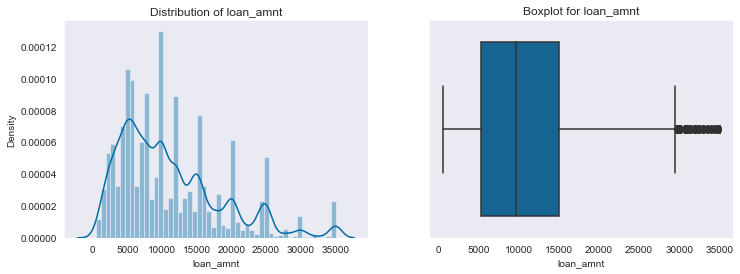

In [35]:
var = 'loan_amnt'
dist_descr_num(var=var, df=loan_df)
distplot_num(var=var, df=loan_df)

In [36]:
#Create bins
loan_df['loan_amnt_bin'] = pd.cut(loan_df.loan_amnt
                       ,bins =[0,5000,10000,15000,20000,25000,30000,36000] 
                       , labels = ['0-5k','5-10k','10-15k','15-20k','20-25k','25-30k','30-36k'])

#check
loan_df.loan_amnt_bin.head()

0     0-5k
1     0-5k
2     0-5k
3    5-10k
5     0-5k
Name: loan_amnt_bin, dtype: category
Categories (7, object): ['0-5k' < '5-10k' < '10-15k' < '15-20k' < '20-25k' < '25-30k' < '30-36k']

#### **Annual Income**


Percentile distribution of annual_inc

count      38514.00
mean       68811.40
std        64223.55
min         4000.00
0%          4000.00
1%         14400.00
5%         24000.00
10%        30000.00
25%        40000.00
50%        59000.00
75%        82000.00
90%       115000.00
95%       140004.00
99%       234000.00
max      6000000.00
Name: annual_inc, dtype: float64


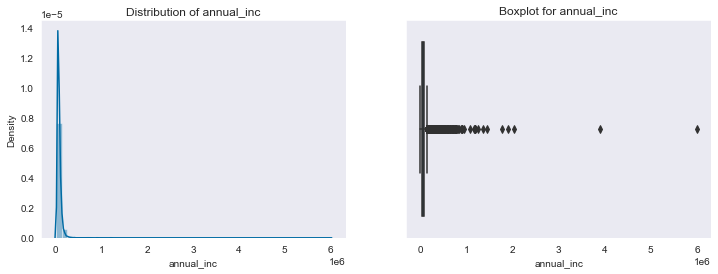

In [37]:
var = 'annual_inc'
dist_descr_num(var=var, df=loan_df)
distplot_num(var=var, df=loan_df)

In [38]:
#Create bins
loan_df['annual_inc_bin'] = pd.cut(loan_df.annual_inc
                       ,bins =[0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000,6000000] 
                       , labels = ['0-20k','20-40k','40-60k','60-80k','80-100k','100-120k','120-140k',
                                  '140-160k','160-180k','180-200k','200k+'])

#check
loan_df.annual_inc_bin.head()

0    20-40k
1    20-40k
2     0-20k
3    40-60k
5    20-40k
Name: annual_inc_bin, dtype: category
Categories (11, object): ['0-20k' < '20-40k' < '40-60k' < '60-80k' ... '140-160k' < '160-180k' < '180-200k' < '200k+']

#### **DTI**


Percentile distribution of dti

count    38514.00
mean        13.28
std          6.67
min          0.00
0%           0.00
1%           0.36
5%           2.11
10%          4.06
25%          8.14
50%         13.37
75%         18.56
90%         22.29
95%         23.80
99%         26.53
max         29.99
Name: dti, dtype: float64


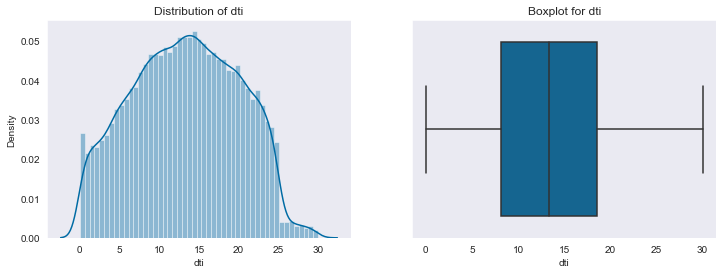

In [39]:
var = 'dti'
dist_descr_num(var=var, df=loan_df)
distplot_num(var=var, df=loan_df)

In [40]:
#Create bins
loan_df['dti_bin'] = pd.cut(loan_df.dti
                       ,bins =[0,5,10,15,20,25,30] 
                       , labels = ['0-5','5-10','10-15','15-20','20-25','25-30'])
                                  

#check
loan_df.dti_bin.head()

0    25-30
1      0-5
2     5-10
3    15-20
5    10-15
Name: dti_bin, dtype: category
Categories (6, object): ['0-5' < '5-10' < '10-15' < '15-20' < '20-25' < '25-30']

#### **Interest Rate**


Percentile distribution of int_rate

count    38514.00
mean        11.93
std          3.69
min          5.42
0%           5.42
1%           5.42
5%           6.17
10%          7.14
25%          8.94
50%         11.71
75%         14.35
90%         16.82
95%         18.30
99%         20.90
max         24.40
Name: int_rate, dtype: float64


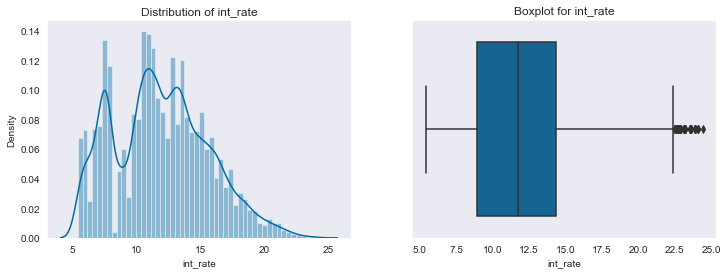

In [41]:
var = 'int_rate'
dist_descr_num(var=var, df=loan_df)
distplot_num(var=var, df=loan_df)

In [42]:
#Create bins
loan_df['int_rate_bin'] = pd.cut(loan_df.int_rate
                       ,bins =[5,10,15,20,25] 
                       , labels = ['5-10','10-15','15-20','20-25'])
                                  

#check
loan_df.int_rate_bin.head()

0    10-15
1    15-20
2    15-20
3    10-15
5     5-10
Name: int_rate_bin, dtype: category
Categories (4, object): ['5-10' < '10-15' < '15-20' < '20-25']

In [43]:
#### DO WE NEED ANOTHER ONE FOR INSTALLMENTS????

### **Derived columns & Binning**

In [44]:
######## LOAN AMOUNT TO ANNUAL INCOME RATIO - derived variable
loan_df['loan_to_income_ratio'] = loan_df.loan_amnt/loan_df.annual_inc

loan_df.loan_to_income_ratio.head()

0    0.208333
1    0.083333
2    0.195886
3    0.203252
5    0.138889
Name: loan_to_income_ratio, dtype: float64

#### Loan to Income Ratio

In [45]:
loan_df.loan_to_income_ratio.describe(percentiles=[0,0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99]).round(2)

count    38514.00
mean         0.19
std          0.12
min          0.00
0%           0.00
1%           0.02
5%           0.04
10%          0.06
25%          0.10
50%          0.16
75%          0.25
90%          0.35
95%          0.41
99%          0.52
max          0.83
Name: loan_to_income_ratio, dtype: float64

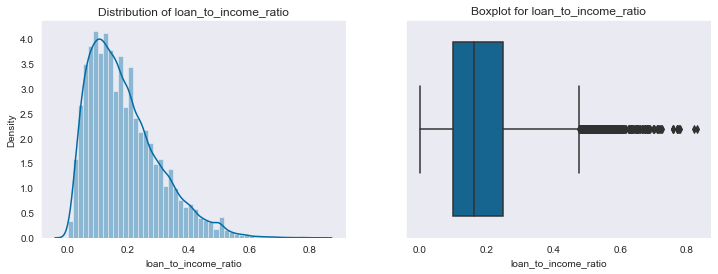

In [46]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.distplot(loan_df.loan_to_income_ratio)
plt.title("Distribution of loan_to_income_ratio")

plt.subplot(1,2,2)
sns.boxplot(loan_df.loan_to_income_ratio)
plt.title("Boxplot for loan_to_income_ratio")
    
plt.show()       

In [47]:
#Create bins
loan_df['loan_to_income_ratio_bin'] = pd.cut(loan_df.loan_to_income_ratio
                       ,bins =[0,0.05,0.10,0.15,0.20,0.25,0.3,0.35,0.4,0.45,0.84] 
                       , labels = ['0-.5','.5-.10','.10-.15','.15-.20','.20-.25',
                                  '.25-.30','.30-.35','.35-.40','.40-.45','.45+'])
                                  

#check
loan_df.loan_to_income_ratio_bin.head()

0    .20-.25
1     .5-.10
2    .15-.20
3    .20-.25
5    .10-.15
Name: loan_to_income_ratio_bin, dtype: category
Categories (10, object): ['0-.5' < '.5-.10' < '.10-.15' < '.15-.20' ... '.30-.35' < '.35-.40' < '.40-.45' < '.45+']

##### CONVERT DATE COLUMNS INTO DATETIME format and extract month & year
###### DATE COLUMNS

### Loan Issue Date

In [48]:
# Extract Year from Issue date for categorical analysis
loan_df['issue_y']=loan_df['issue_d'].dt.year.astype(str)
print(loan_df.issue_y.head())

0    2011
1    2011
2    2011
3    2011
5    2011
Name: issue_y, dtype: object


### Credit Age
####    Credit Age can be derived by finding timedelta between Date when the 'loan was funded' to when 'first credit line was opened'  

In [49]:
# Calculate credit age from when the 'loan was funded' to when 'first credit line was opened'
loan_df['credit_age']=loan_df.issue_d - loan_df.earliest_cr_line
print(loan_df.credit_age.describe())

print(" \nConverting Delta from days to Years \n")
loan_df['credit_age'] = loan_df['credit_age']/ np.timedelta64(1, "Y")
loan_df['credit_age'] = np.around(loan_df.credit_age,0).astype(np.int64)
print(loan_df.credit_age.describe())

# Check new
loan_df.credit_age.head()

count                           38514
mean     5014 days 22:06:58.382925696
std      2494 days 20:56:32.085670048
min                1095 days 00:00:00
25%                3318 days 00:00:00
50%                4566 days 00:00:00
75%                6209 days 00:00:00
max               23892 days 00:00:00
Name: credit_age, dtype: object
 
Converting Delta from days to Years 

count    38514.000000
mean        13.725970
std          6.839905
min          3.000000
25%          9.000000
50%         13.000000
75%         17.000000
max         65.000000
Name: credit_age, dtype: float64


0    27
1    13
2    10
3    16
5     7
Name: credit_age, dtype: int64

In [50]:
# Create bin for credit age
#Create bins
loan_df['credit_age_bin'] = pd.qcut(loan_df['credit_age'], q=15, precision=0)
#check
loan_df.loan_to_income_ratio_bin.value_counts()

.10-.15    7418
.5-.10     7341
.15-.20    6558
.20-.25    4864
.25-.30    3307
0-.5       2889
.30-.35    2416
.35-.40    1624
.45+       1192
.40-.45     905
Name: loan_to_income_ratio_bin, dtype: int64

# 3.) Exploratory Analysis & Data Visualisation 
- univariates,
- bivariates, 
- derived variables, 
- % metric,
- types of visuals

In [51]:
# Target variable
loan_df['Default_flag'] = loan_df.loan_status.apply(lambda x : 1 if x == 'Charged Off' else 0)
#check
loan_df.Default_flag.value_counts()

0    32906
1     5608
Name: Default_flag, dtype: int64

In [52]:
# Target variable Yes/No
loan_df['Default_YesNo'] = loan_df.loan_status.apply(lambda x : 'Yes' if x == 'Charged Off' else 'No')
#check
loan_df.Default_YesNo.value_counts()

No     32906
Yes     5608
Name: Default_YesNo, dtype: int64

### **Variables of interest for the analysis:**

In [53]:
#Before starting analysis, lets check all columns we have and figure out which ones to use
#loan_df = loan_df.reset_index()

#loan_df.columns
print(loan_df.columns.tolist())

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'recoveries', 'collection_recovery_fee', 'last_credit_pull_d', 'pub_rec_bankruptcies', 'loan_amnt_bin', 'annual_inc_bin', 'dti_bin', 'int_rate_bin', 'loan_to_income_ratio', 'loan_to_income_ratio_bin', 'issue_y', 'credit_age', 'credit_age_bin', 'Default_flag', 'Default_YesNo']


In [54]:
# Break down our list into how we want to use going forward from here
categ_var_list_of_interest = ['emp_length','term','grade','sub_grade', 'home_ownership'
            ,'verification_status','delinq_2yrs', 'open_acc','pub_rec_bankruptcies','addr_state','issue_y']

num_var_list_of_interest = ['loan_amnt','annual_inc','int_rate','installment','dti','credit_age']

num_var_bins_list = ['loan_amnt_bin','annual_inc_bin','int_rate_bin','dti_bin','loan_to_income_ratio_bin','credit_age_bin']

date_related_columns = ['issue_d','earliest_cr_line','last_credit_pull_d']

other_columns = ['id','member_id','funded_amnt','funded_amnt_inv','emp_title','loan_status',
                'url','desc','purpose','title','zip_code','inq_last_6mths','pub_rec',
                'revol_bal','revol_util','total_acc','recoveries','collection_recovery_fee',
                ]

### Analysing Categorical variables

In [55]:
def plot_categ(df,var,figsize=[12,8]):  
         
        plt.figure(figsize=figsize)
        plt.subplot(1,2,1)
        sns.countplot(y=loan_df[var])
        plt.title(("Distribution of " + var), fontsize=12)
                
        plt.subplot(1,2,2)
        sns.barplot(y=df[var], x=df['Default_flag'], palette = 'hls')
        plt.title("Default Rate by " + var, fontsize=12)
        plt.show()

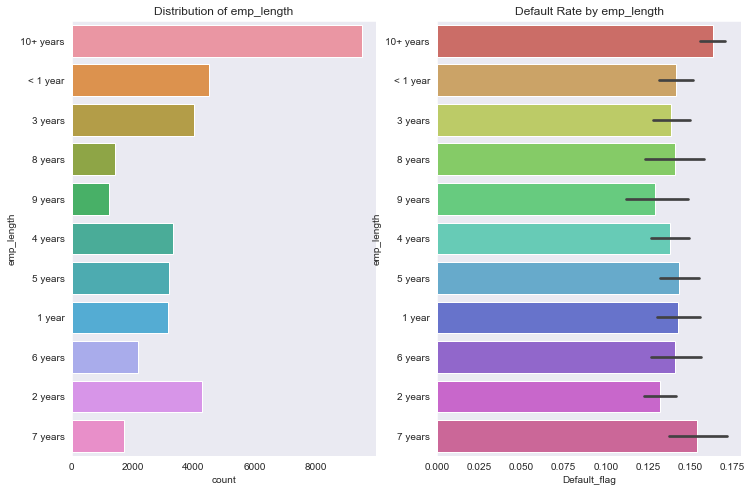

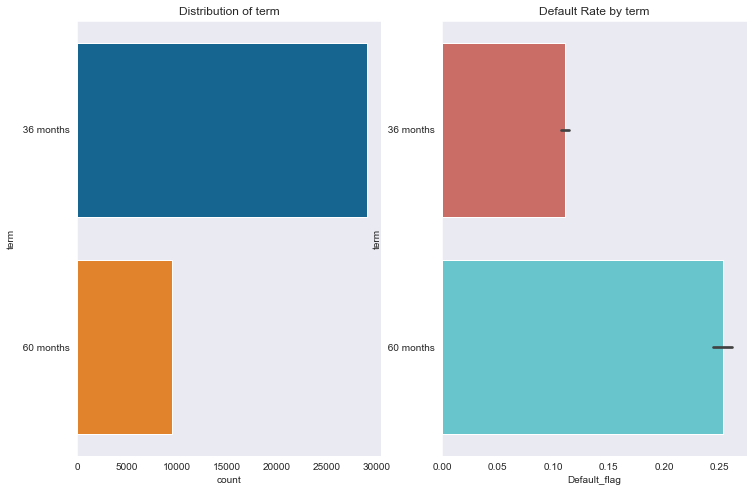

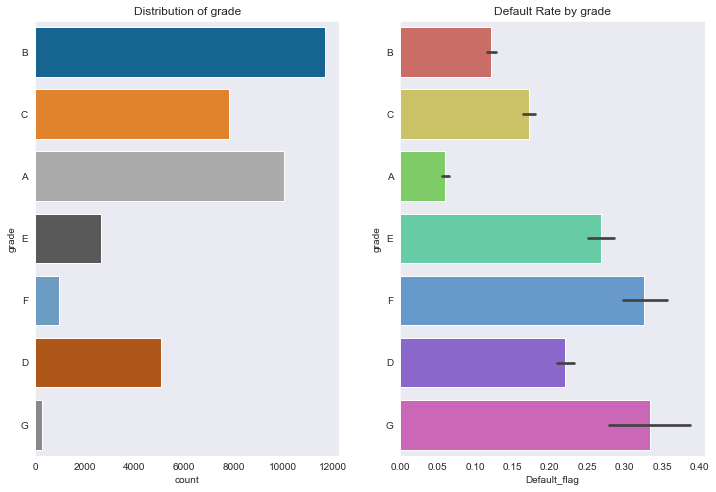

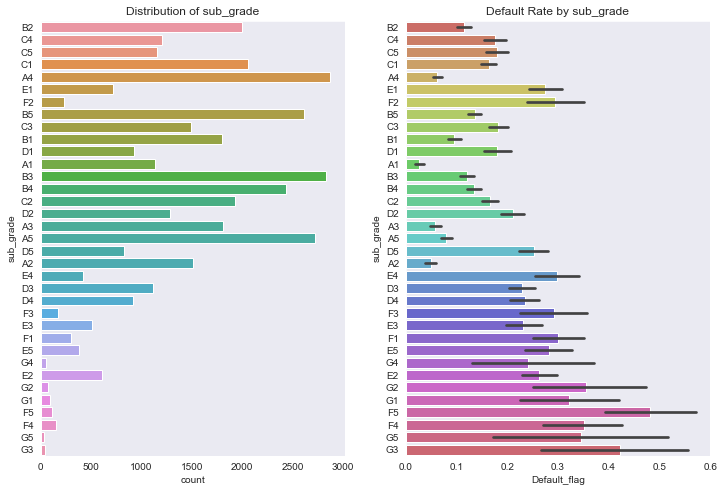

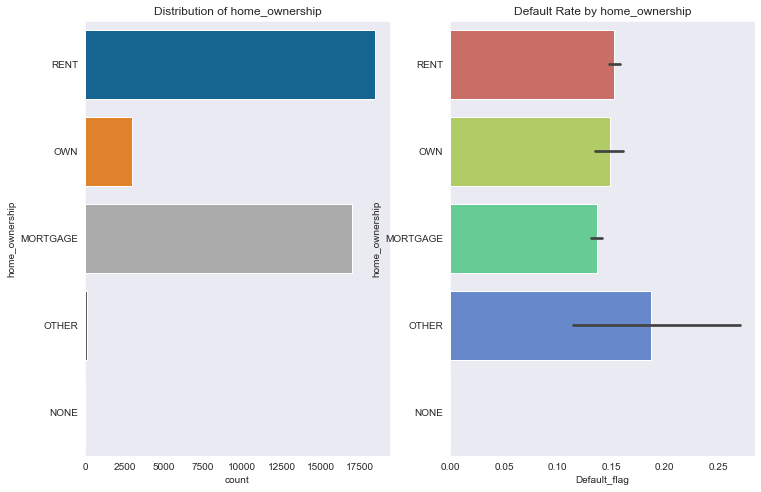

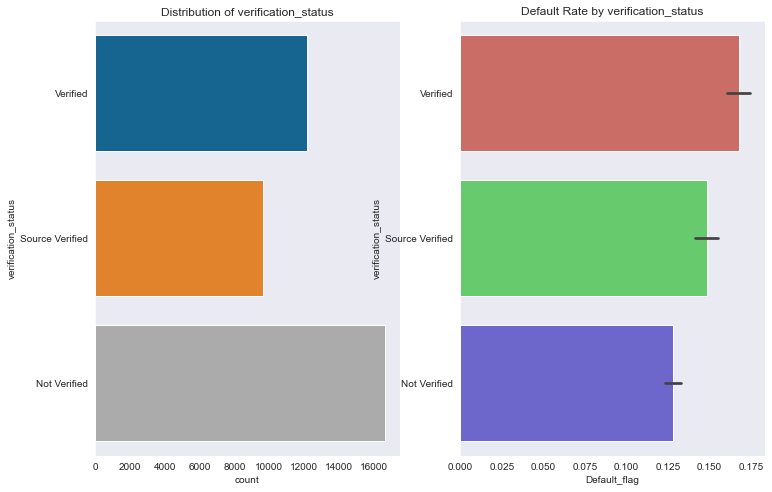

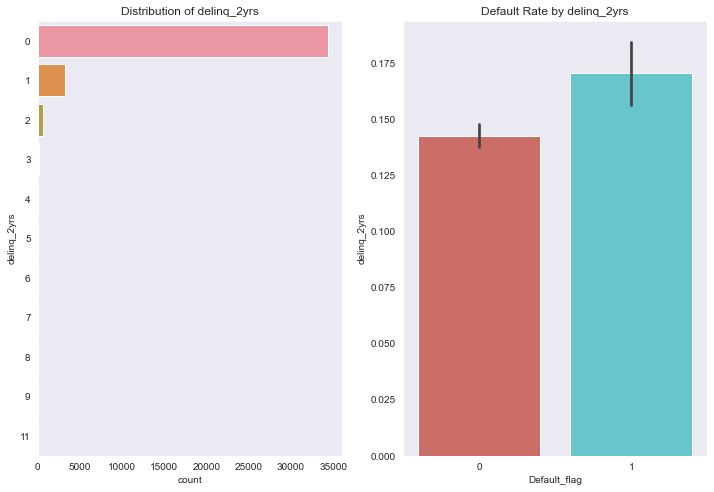

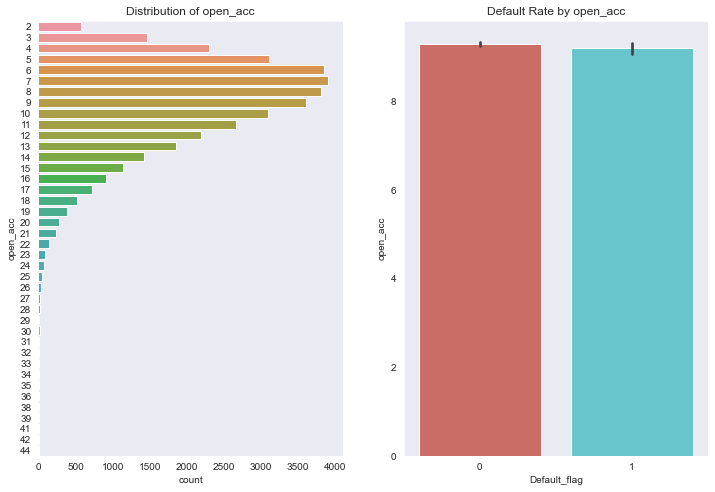

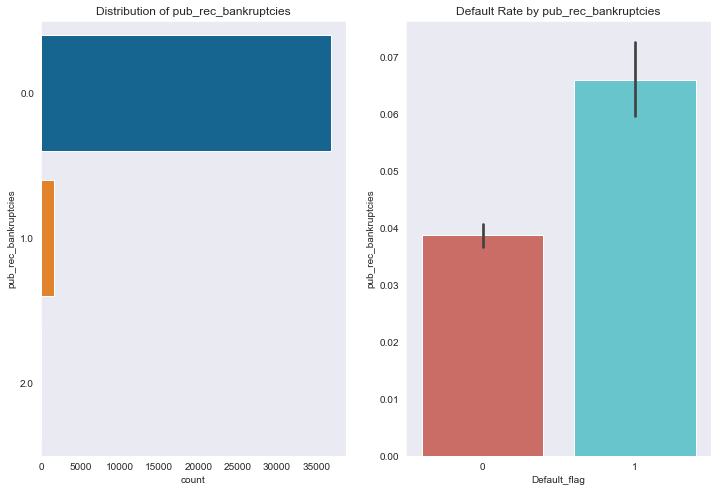

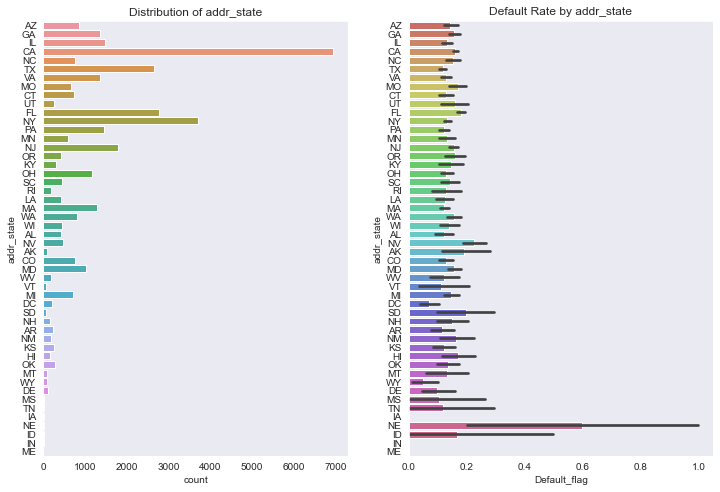

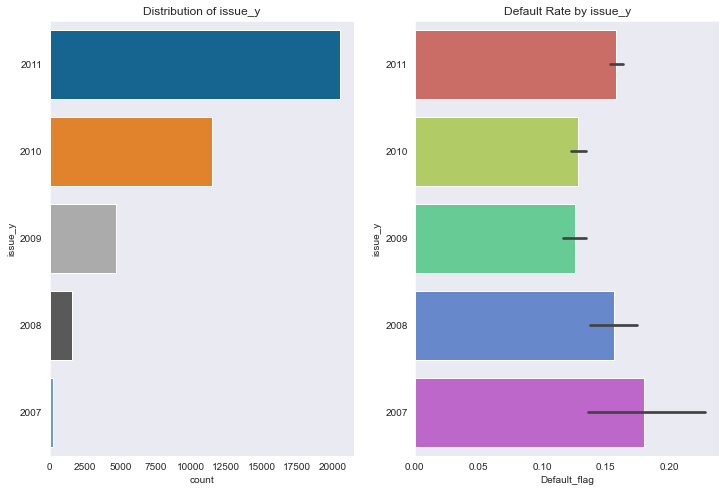

In [56]:
for var in categ_var_list_of_interest:
    plot_categ(df = loan_df, var=var)

### Analysing Numerical variables


In [57]:
def num_plot(df, var):
    sns.boxplot(y = df[var],x = df['Default_flag'],palette='hls')
    plt.title(("Box plot & Variation between Default Flag and " + var), fontsize=12)
    plt.show()

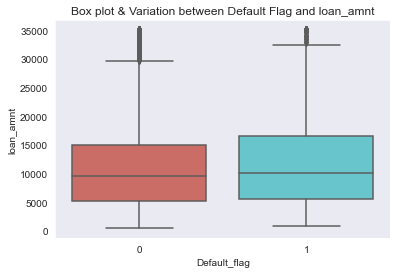

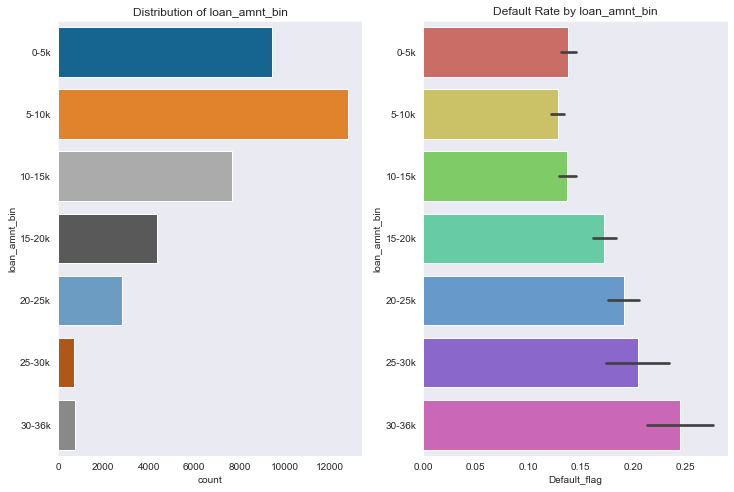

In [58]:
var = 'loan_amnt'
var_bin = var+'_bin'
num_plot(loan_df, var)
plot_categ(loan_df,var_bin,figsize=[12,8])

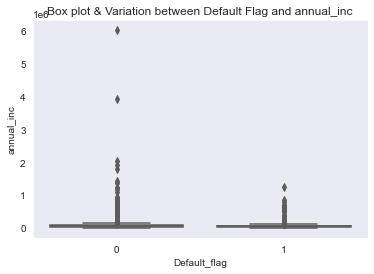

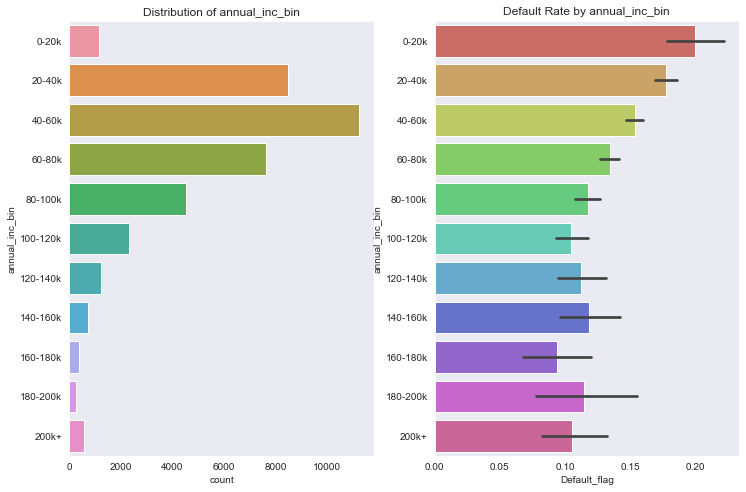

In [59]:
var = 'annual_inc'
var_bin = var+'_bin'
num_plot(loan_df, var)
plot_categ(loan_df,var_bin,figsize=[12,8])

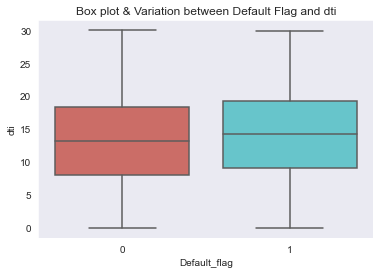

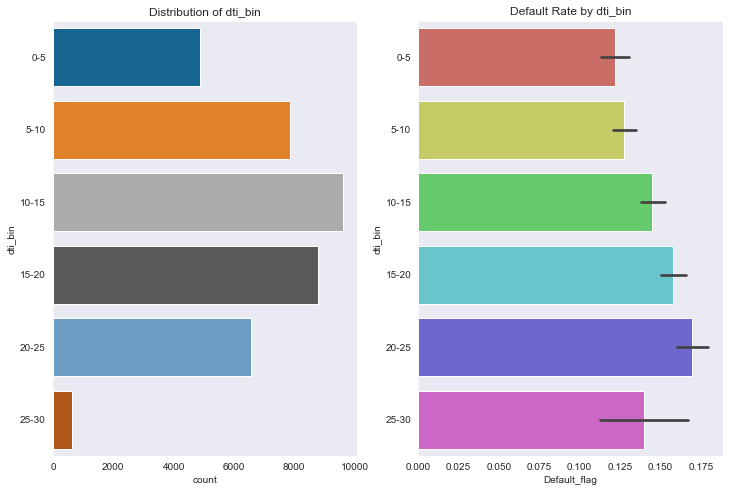

In [60]:
var = 'dti'
var_bin = var+'_bin'
num_plot(loan_df, var)
plot_categ(loan_df,var_bin,figsize=[12,8])

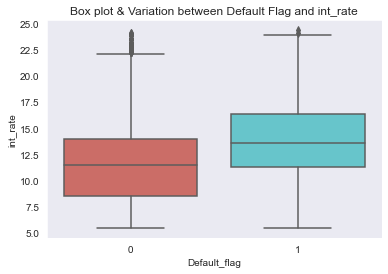

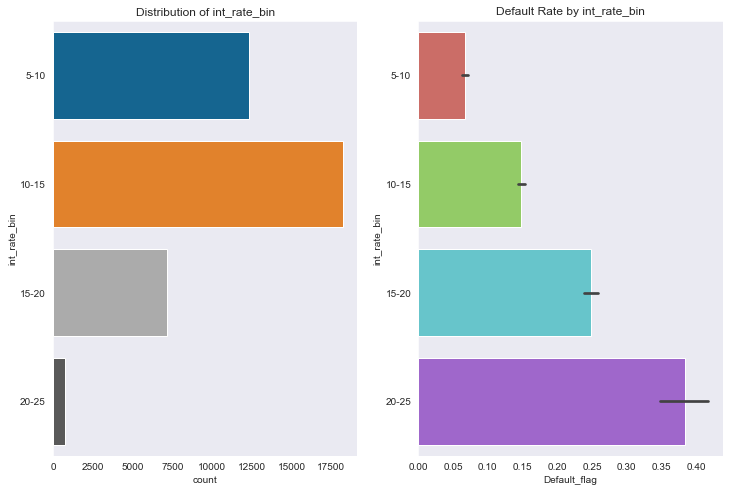

In [61]:
var = 'int_rate'
var_bin = var+'_bin'
num_plot(loan_df, var)
plot_categ(loan_df,var_bin,figsize=[12,8])

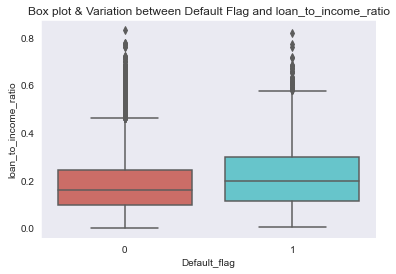

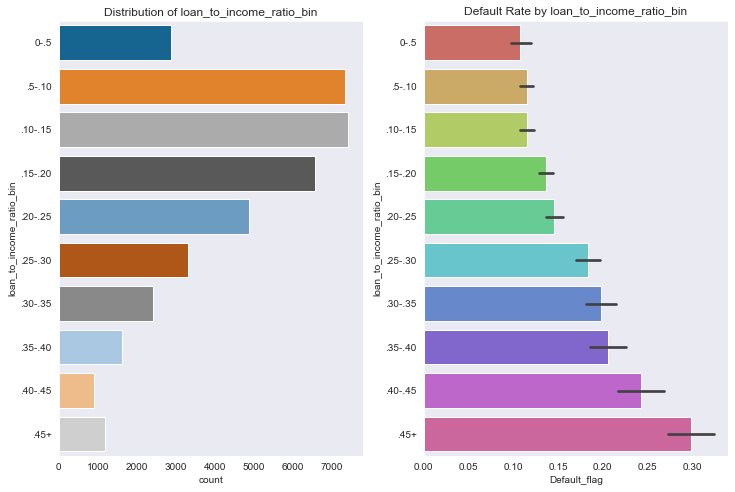

In [62]:
var = 'loan_to_income_ratio'
var_bin = var+'_bin'
num_plot(loan_df, var)
plot_categ(loan_df,var_bin,figsize=[12,8])

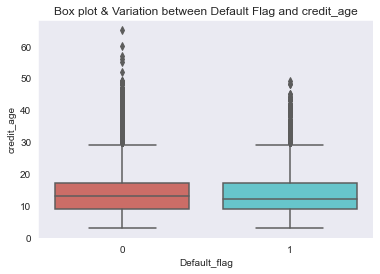

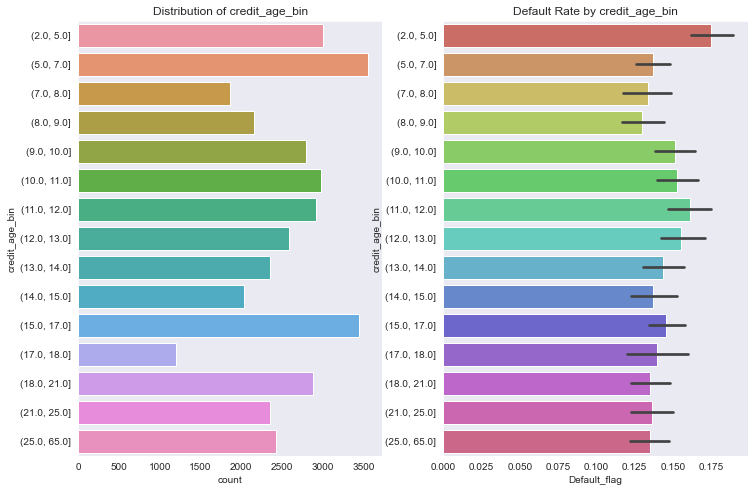

In [63]:
var = 'credit_age'
var_bin = var+'_bin'
num_plot(loan_df, var)
plot_categ(loan_df,var_bin,figsize=[12,8])

### Correlation findings among variables

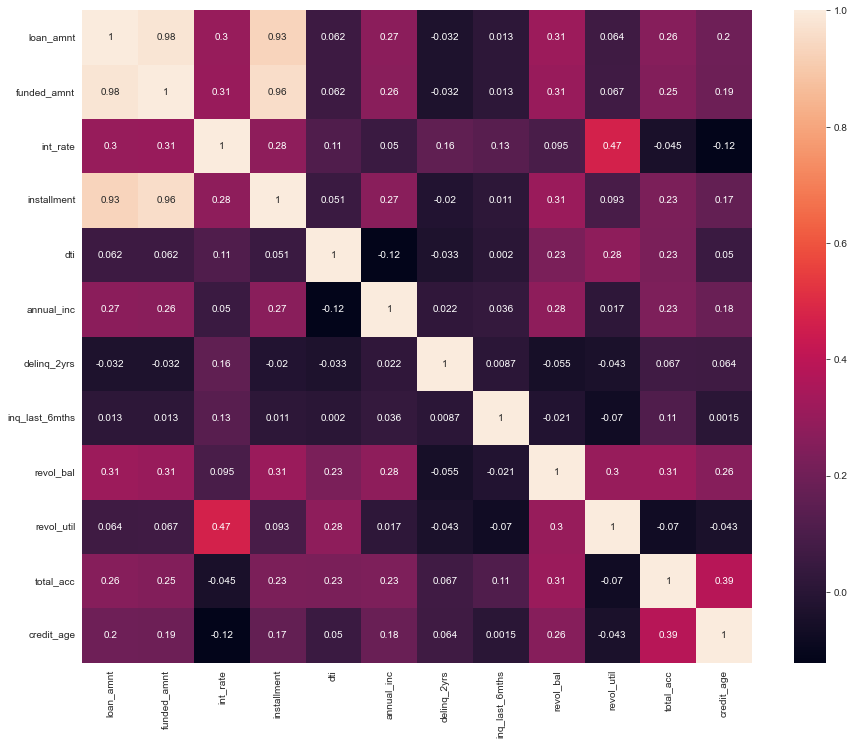

In [64]:
loan_corr = loan_df[['loan_amnt','funded_amnt','term','int_rate','installment','emp_length','dti','annual_inc','delinq_2yrs','inq_last_6mths','revol_bal','revol_util','total_acc','credit_age']].corr()
plt.figure(figsize=[15,12])
sns.heatmap(loan_corr,annot=True)
plt.show()

## 4.) Findings/Results/Insights/Summary/Recommendations

Notes from our chat:
    
- Cleaning:
    - complete imputing missing values for all
    - fixing formats (intrest rate, )
    - outliers?
    
- Analysis:
    - Continuous variables - box plot Vs Default Flag;
    - Continuous variables - binning and then mean of default flag
    - Categorical variable - box plot and plot mean of default flag

- Create new Derived variables?   

- first cut of vars to try:
    - loan_amnt
    - term
    - int_rate
    - installment
    - grade & subgrade
    - purpose
    - title?
    - application_type

   -  emp length
    - home_owner
    - annual_inc
    - verification status & annual inc (try bivariate heat map)
    - addr_state
    - dti
    - delinq_2yrs
    - earliest_cr_line -- (time since first credit line, use difference btween issue date & earliest cr date)
    - inq_last_6mnths
    - open_acc or total_acc ?
    - revol_bal, revol_util
    - pub_rec_bankruptcies, tax_liens


- Not sure:
    - chargeoff_within_12_mths
    


